# here my data is compared to Gunters publiction

In [9]:
import pandas as pd
import numpy as np
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn
import geopandas as gpd


# check data with spat ref

In [382]:
control=pd.read_excel('DATA/control_gunter.xlsx')
data=gpd.read_file('final/complete_KKA.geojson')
data_all=gpd.read_file('final/complete.geojson')
database=pd.read_excel('final/database.xlsx')


In [324]:
control=pd.read_excel('DATA/control_gunter.xlsx')


In [383]:
control

,Bundesland,<=50PE,PE_sum,<=500PE
0,Burgenland,20,198,23
1,Carintia,6961,62459,7279
2,Salzburg,1655,20924,1732
3,Lower-Austria,4515,50655,4982
4,Upper-Austria,2398,29412,2524
5,Stirya,10665,85726,10718
6,Tirol,1096,9508,1294
7,Vorarlberg,129,1331,156
8,Vienna,13,280,25


In [387]:
data_BL

,BL,freq,sum_PE
0,Carintia,6747,60573.493151
1,Lower-Austria,3835,43501.000000
2,Salzburg,1631,20660.826667
3,Stirya,10123,80535.000000
4,Tirol,1097,9457.533333
5,Upper-Austria,2522,30880.000000


In [392]:
control_df

,Bundesland,control_freq,sum_PE_control,control_freq_all,freq_all_x,sum_PE_all_x,diff_freq,diff_PE,diff_PE_%,freq_all_y,sum_PE_all_y
0,Carintia,6961,62459,7279,7052,97832.559817,-91,-35373.559817,-36.157247,7052,97832.559817
1,Salzburg,1655,20924,1732,1708,30336.960000,-53,-9412.960000,-31.028027,1708,30336.960000
2,Lower-Austria,4515,50655,4982,4313,124026.000000,202,-73371.000000,-59.157757,4313,124026.000000
3,Upper-Austria,2398,29412,2524,2633,48172.000000,-235,-18760.000000,-38.943785,2633,48172.000000
4,Stirya,10665,85726,10718,10173,84977.000000,492,749.000000,0.881415,10173,84977.000000
5,Tirol,1096,9508,1294,1294,32385.226667,-198,-22877.226667,-70.640934,1294,32385.226667


In [391]:
#prepare own data 
data_BL=data.groupby('BL').sum().reset_index()[['BL','PE_nonitri','sum_PE','freq']]
data_BL=data_BL[['BL','freq','sum_PE']]
data_BL_all=data_all.groupby('BL').sum().reset_index()[['BL','PE_nonitri','sum_PE','freq']]
data_BL_all=data_BL_all[['BL','freq','sum_PE']]
data_BL_all.rename(columns={'freq':'freq_all','sum_PE':'sum_PE_all', 'BL':'Bundesland'}, inplace=True)
#data_BL_all=data_BL_all.set_index('Bundesland')

#merge
control_df=pd.merge(control, data_BL_all, on='Bundesland')
control_df.rename(columns={'<=50PE':'control_freq','PE_sum':'sum_PE_control','<=500PE':'control_freq_all'},inplace=True)
#control_df=control_df[['Bundesland','control_freq','freq','sum_PE_control','sum_PE']]
control_df.sum_PE=control_df.sum_PE_all.round().astype(int)
control_df['diff_freq']=control_df.control_freq-control_df.freq_all
control_df['diff_PE']=control_df.sum_PE_control-control_df. sum_PE_all
control_df['diff_PE_%']=control_df.diff_PE/control_df.sum_PE_all*100
control_df=pd.merge(control_df, data_BL_all, on='Bundesland')
#control_df=control_df[['Bundesland','control_freq','freq','diff_freq', 'sum_PE_control','sum_PE', 'diff_PE','diff_PE_%', 'control_freq_all','freq_all','sum_PE_all']]
control_df['diff_freq_all']=control_df.control_freq_all-control_df.freq_all
control_df.sum_PE_all=control_df.sum_PE_all.round().astype(int)
control_df.to_excel('DATA/control_gunter_output.xlsx', index=False)
control_KKA=control_df[['Bundesland', 'control_freq', 'freq', 'diff_freq', 'sum_PE_control',
       'sum_PE', 'diff_PE', 'diff_PE_%']]
control_all=control_df[['Bundesland','control_freq_all', 'freq_all', 'diff_freq_all']]

C:\Users\fabrizio\AppData\Local\Temp/ipykernel_7532/2999933272.py:13: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  control_df.sum_PE=control_df.sum_PE_all.round().astype(int)


AttributeError: 'DataFrame' object has no attribute 'freq_all'

In [211]:
control_all['div']=(control_all.control_freq_all-control_all.freq_all)/control_all.control_freq_all*100
control_all['div']=control_all['div'].round(2)
control_all.sort_values('div')

C:\Users\fabrizio\AppData\Local\Temp/ipykernel_7532/1151738831.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  control_all['div']=(control_all.control_freq_all-control_all.freq_all)/control_all.control_freq_all*100
C:\Users\fabrizio\AppData\Local\Temp/ipykernel_7532/1151738831.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  control_all['div']=control_all['div'].round(2)


,Bundesland,control_freq_all,freq_all,diff_freq_all,div
3,Upper-Austria,2524,2633,-109,-4.32
5,Tirol,1294,1294,0,0.00
1,Salzburg,1732,1708,24,1.39
0,Carintia,7279,7052,227,3.12
4,Stirya,10718,10173,545,5.08
2,Lower-Austria,4982,4313,669,13.43


# result of all : 
    > no PE control available

In [376]:
data_BL=data.groupby('BL').sum().reset_index()[['BL','PE_nonitri','sum_PE','freq']]
data_BL=data_BL[['BL','freq','sum_PE']]
data_BL_all=data_all.groupby('BL').sum().reset_index()[['BL','PE_nonitri','sum_PE','freq']]
data_BL_all=data_BL_all[['BL','freq','sum_PE']]
data_BL_all.rename(columns={'freq':'freq_all','sum_PE':'sum_PE_all', 'BL':'Bundesland'}, inplace=True)
data_BL_all=data_BL_all.set_index('Bundesland')

control_df=control.join(data_BL_all, how='left')

control_df.rename(columns={'<=500PE':'control_freq_all'},inplace=True)
#control_df=control_df[['Bundesland','control_freq','freq','sum_PE_control','sum_PE']]
control_df['diff_freq']=control_df.control_freq_all-control_df.freq_all
control_df=control_df[['control_freq_all','freq_all']]
control_df['diff_freq_all']=control_df.control_freq_all-control_df.freq_all
control_df=control_df.fillna(0)
control_df.freq_all=control_df.freq_all.astype(int)
control_df.diff_freq_all=control_df.diff_freq_all.astype(int)

In [377]:
control_df

,control_freq_all,freq_all,diff_freq_all
Bundesland,,,
Burgenland,23,0,0
Carintia,7279,7052,227
Salzburg,1732,1708,24
Lower-Austria,4982,4313,669
Upper-Austria,2524,2633,-109
Stirya,10718,10173,545
Tirol,1294,1294,0
Vorarlberg,156,0,0
Vienna,25,0,0


# compare <500 gunter with my spatial data: what is lost in spatial reference?

In [380]:
(control_df.control_freq_all.sum()-control_df.freq_all.sum())/control_df.control_freq_all.sum()*100

4.753058291562971

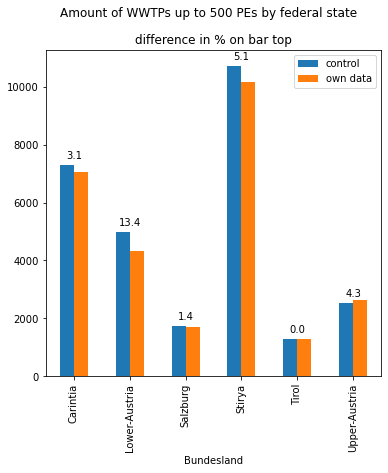

In [261]:
fig,ax=plt.subplots(figsize=(6,6))
control_all.sort_values('Bundesland').plot.bar(x='Bundesland',y=['control_freq_all','freq_all'],ax=ax)
which=[9,10,11,12,13,14,15,16,17]
values=[x for x in control_all.sort_values('Bundesland')['div'].round(1)]
values[5]=4.3

ax.legend(['control','own data'])
plt.suptitle('Amount of WWTPs up to 500 PEs by federal state')
ax.set_title('difference in % on bar top')


#which=range(len(ax.patches))
#which=[6,7,8,9,10,11]
which=[0,1,2,3,4,5]
n=0
for index, rect in enumerate(ax.patches):
    if index in which:
        
        height = rect.get_height()
        ax.text(rect.get_x()+0.13 + rect.get_width() / 2, height+150 , values[n],
                ha='center', va='bottom', fontsize='medium', fontstretch='condensed')
        n=n+1
plt.savefig('graphs/all_precision.png', bbox_inches='tight')

# result of KKA:
    >looks good 
    > difference is due to missing spat ref

In [7]:
control_KKA


,Bundesland,control_freq,freq,diff_freq,sum_PE_control,sum_PE,diff_PE,diff_PE_%
0,Carintia,6961,6747,214,62459,60573,1886,3.113598
1,Salzburg,1655,1631,24,20924,20661,263,1.272930
2,Lower-Austria,4515,3835,680,50655,43501,7154,16.445599
3,Upper-Austria,2398,2522,-124,29412,30880,-1468,-4.753886
4,Stirya,10665,10123,542,85726,80535,5191,6.445645
5,Tirol,1096,1097,-1,9508,9458,50,0.528653


<AxesSubplot:xlabel='Bundesland'>

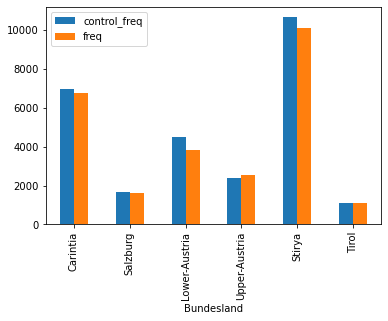

In [8]:
control_KKA.plot.bar(x='Bundesland',y=['control_freq','freq'])

<AxesSubplot:xlabel='Bundesland'>

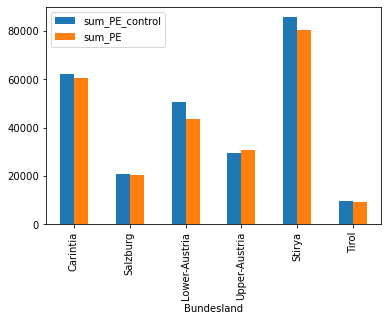

In [9]:
control_KKA.plot.bar(x='Bundesland',y=['sum_PE_control','sum_PE'])

# result
    > relative small differences all in all
    > PE difference up to 16% for NOE
    > difference seems to stay similar when comparing <500 and <50. reason is probably some mask in code

# NR of WWTPS with geo ref is correct
# 

# check database of KKA
    > here no spat ref reduction

In [50]:
control=pd.read_excel('DATA/control_gunter.xlsx')
database=database[database.PE<=50]
database.PE=database.PE.astype(np.int64).round()
data_BL=database.groupby('BL').sum().reset_index()[['BL','PE']]
data_BL=data_BL[['BL','PE']]

x=database.groupby('BL').count().reset_index()[['BL','PE']]
x.rename(columns={'PE':'freq'},inplace=True)
data_BL=pd.merge(data_BL, x, on='BL')

control=control[['Bundesland','<=50PE','PE_sum']]
control.rename(columns={'Bundesland':'BL'},inplace=True)
control=pd.merge(control, data_BL, on='BL')
control=control[['BL','<=50PE','freq','PE_sum','PE']]

control
control['accuracy']=control['<=50PE']/control.freq*100
control['accuracy']=control['accuracy'].round(2)
control.sort_values('accuracy')

,BL,<=50PE,freq,PE_sum,PE,accuracy
4,Upper-Austria,2398,2522,29412,30880,95.08
3,Lower-Austria,4515,4544,50655,50657,99.36
1,Carintia,6961,6978,62459,61470,99.76
6,Tirol,1096,1097,9508,9436,99.91
2,Salzburg,1655,1656,20924,20613,99.94
0,Burgenland,20,20,198,198,100.00
5,Stirya,10665,10665,85726,85726,100.00
7,Vorarlberg,129,129,1331,1331,100.00
8,Vienna,13,13,280,280,100.00


# result
    > great! nearly perfect

# check database 500PE

In [243]:
control=pd.read_excel('DATA/control_gunter.xlsx')
database=database[database.PE<=500]
database.PE=database.PE.astype(np.int64).round()
data_BL=database.groupby('BL').count().reset_index()[['BL','PE']]
data_BL.rename(columns={'PE':'freq'},inplace=True)


control=control[['Bundesland','<=500PE']]
control.rename(columns={'Bundesland':'BL'},inplace=True)
control=pd.merge(control, data_BL, on='BL')
control=control[['BL','<=500PE','freq']]

control
control['diff']=(control['<=500PE']-control.freq)/control['<=500PE']*100
control['diff']=control['diff'].round(2)
control.sort_values('diff')

,BL,<=500PE,freq,diff
4,Upper-Austria,2524,2633,-4.32
3,Lower-Austria,4982,5025,-0.86
1,Carintia,7279,7293,-0.19
0,Burgenland,23,23,0.00
5,Stirya,10718,10718,0.00
6,Tirol,1294,1294,0.00
7,Vorarlberg,156,156,0.00
8,Vienna,25,25,0.00
2,Salzburg,1732,1730,0.12


# to do
    > maybe add definitoon of text as pathc below legend
    > move carintia text above

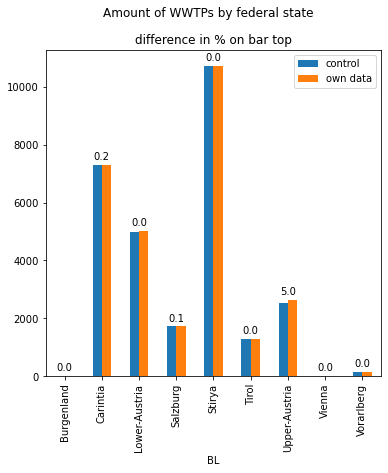

In [248]:
fig,ax=plt.subplots(figsize=(6,6))
control.sort_values('BL').plot.bar(x='BL',y=['<=500PE','freq'],ax=ax)
which=[9,10,11,12,13,14,15,16,17]
values=[x for x in control.sort_values('BL')['diff'].round(1).abs()]
values[2]=0.0
values[6]=5.0
ax.legend(['control','own data'])
plt.suptitle('Amount of WWTPs by federal state')
#which=range(len(ax.patches))
ax.set_title('difference in % on bar top')

n=0
for index, rect in enumerate(ax.patches):
    if index in which:
        
        height = rect.get_height()
        ax.text(rect.get_x()-0.13 + rect.get_width() / 2, height+100 , values[n],
                ha='center', va='bottom', fontsize='medium', fontstretch='ultra-condensed')
        n=n+1
plt.savefig('graphs/database_precision.png', bbox_inches='tight')

# control tech_type of KKA

In [199]:
control=pd.read_excel('DATA/control_gunter.xlsx', sheet_name=1)
database=database[database.PE<=50]
x=database.groupby(['BL','tech_type']).PE.sum().reset_index().pivot('BL','tech_type','PE')
test=pd.merge(x,control, on="BL")
test=test.fillna(0)
test['unbek+andere']=test.Andere+test.Unbekannt
x=test[['BL','3-k','mechan','Bel.','Belebung','PKA','PKA_','SBR','SBR_','unbek+andere','Unbek+andere']]
x=x.set_index('BL').astype(int)
#x.T

### second column is always control

In [ ]:
x

,3-k,mechan,Bel.,Belebung,PKA,PKA_,SBR,SBR_,unbek+andere,Unbek+andere
BL,,,,,,,,,,
Burgenland,0,0,27,27,111,111,50,50,0,0
Carintia,18122,18456,29052,29621,4832,4858,4777,4779,1188,1310
Lower-Austria,1422,2470,4471,6276,7647,8653,22242,27886,13280,3780
Salzburg,3038,3101,2961,3008,4415,4435,3305,3316,521,776
Stirya,15991,15991,23406,23406,25686,25686,10463,10463,186,563
Tirol,3772,3785,1158,1156,815,822,1389,1388,745,905
Upper-Austria,2150,2718,9098,9111,6841,5952,11062,9448,1549,891
Vorarlberg,59,135,81,76,56,56,295,295,0,38


In [200]:
x['mechanich']=(x.mechan-x['3-k'])/x.mechan*100
x['belebung']=(x.Belebung-x['Bel.'])/x.Belebung*100
x['pka']=(x.PKA_-x.PKA)/x.PKA_*100
x['sbr']=(x.SBR_-x.SBR)/x.SBR_*100
x['andere']=(x['Unbek+andere']-x['unbek+andere'])/x['Unbek+andere']*100


extract=x.iloc[:,-5:]

In [ ]:
x

,3-k,mechan,Bel.,Belebung,PKA,PKA_,SBR,SBR_,unbek+andere,Unbek+andere,mechanich,belebung,andere,pka,sbr
BL,,,,,,,,,,,,,,,
Burgenland,0,0,27,27,0.000000,111,0.000000,50,0,0,NaN,0.000000,NaN,100.000000,100.000000
Carintia,18122,18456,29052,29621,0.535200,4858,0.041850,4779,1188,1310,1.809710,1.920934,9.312977,99.988983,99.999124
Lower-Austria,1422,2470,4471,6276,11.626026,8653,20.239547,27886,13280,3780,42.429150,28.760357,-251.322751,99.865642,99.927420
Salzburg,3038,3101,2961,3008,0.450958,4435,0.331725,3316,521,776,2.031603,1.562500,32.860825,99.989832,99.989996
Stirya,15991,15991,23406,23406,0.000000,25686,0.000000,10463,186,563,0.000000,0.000000,66.962700,100.000000,100.000000
Tirol,3772,3785,1158,1156,0.851582,822,-0.072046,1388,745,905,0.343461,-0.173010,17.679558,99.896401,100.005191
Upper-Austria,2150,2718,9098,9111,-14.936156,5952,-17.082981,9448,1549,891,20.897719,0.142685,-73.849607,100.250943,100.180811
Vorarlberg,59,135,81,76,0.000000,56,0.000000,295,0,38,56.296296,-6.578947,100.000000,100.000000,100.000000


In [ ]:
extract

,mechanich,belebung,pka,sbr,andere
BL,,,,,
Burgenland,NaN,0.000000,0.000000,0.000000,NaN
Carintia,1.809710,1.920934,0.535200,0.041850,9.312977
Lower-Austria,42.429150,28.760357,11.626026,20.239547,-251.322751
Salzburg,2.031603,1.562500,0.450958,0.331725,32.860825
Stirya,0.000000,0.000000,0.000000,0.000000,66.962700
Tirol,0.343461,-0.173010,0.851582,-0.072046,17.679558
Upper-Austria,20.897719,0.142685,-14.936156,-17.082981,-73.849607
Vorarlberg,56.296296,-6.578947,0.000000,0.000000,100.000000


In [201]:
extract=extract.fillna(0).abs().round(1)
extract

,mechanich,belebung,pka,sbr,andere
BL,,,,,
Burgenland,0.0,0.0,0.0,0.0,0.0
Carintia,1.8,1.9,0.5,0.0,9.3
Lower-Austria,42.4,28.8,11.6,20.2,251.3
Salzburg,2.0,1.6,0.5,0.3,32.9
Stirya,0.0,0.0,0.0,0.0,67.0
Tirol,0.3,0.2,0.9,0.1,17.7
Upper-Austria,20.9,0.1,14.9,17.1,73.8
Vorarlberg,56.3,6.6,0.0,0.0,100.0


In [198]:
import seaborn as sn

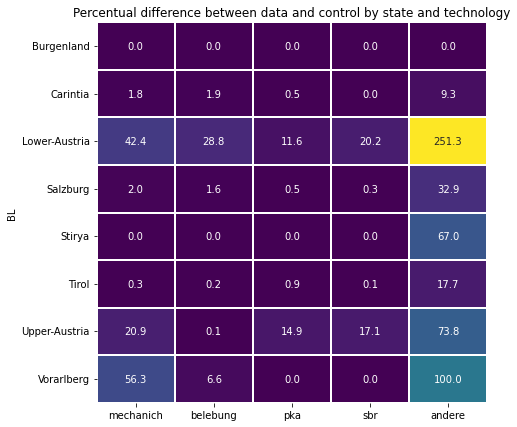

In [203]:
fi,ax=plt.subplots(figsize=(7,7))
sn.heatmap(extract, cmap='viridis', annot=True, fmt='.1f', linewidths=0.01, ax=ax, cbar=False)

ax.set_title('percentual difference between data and control by state and technology'.capitalize())
plt.savefig('graphs/heatmap_control.png', bbox_inches='tight')

In [ ]:
test[['BL','Andere','Unbekannt']]

,BL,Andere,Unbekannt
0,Burgenland,0.0,0.0
1,Carintia,0.0,1188.0
2,Lower-Austria,521.0,12759.0
3,Salzburg,37.0,484.0
4,Stirya,65.0,121.0
5,Tirol,160.0,585.0
6,Upper-Austria,1549.0,0.0
7,Vorarlberg,0.0,0.0


In [ ]:
y=x.loc['Carintia':'Upper-Austria',:]

<AxesSubplot:xlabel='BL'>

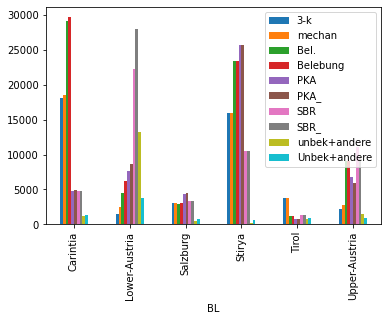

In [ ]:
y.plot.bar()

# check
    > LOWer austria unbekkant > data problem >ask gunter
    > stiria has higher control unbekkant
    > Upper AUS andere > new data

# RESULT
## EVERYTHING LOOKS GOOD, EXCEPT FOR UNBEKANNT. NÖ is particularly bad!

# differnece between database and spatial dtaset

In [251]:
db=database.groupby('BL').sum()

In [252]:
d=data_all.groupby('BL').sum()

In [253]:
x=pd.merge(db,d, on='BL')[['PE','sum_PE']].astype(int)
x['diff']=(x.PE-x.sum_PE)/x.PE*100
x

,PE,sum_PE,diff
BL,,,
Carintia,100001,97832,2.168978
Lower-Austria,129634,124026,4.326026
Salzburg,29089,30336,-4.286844
Stirya,90558,84977,6.162901
Tirol,32359,32385,-0.080349
Upper-Austria,48172,48172,0.000000


In [316]:
x=db.join(d, on='BL').fillna(0)
x['diff']=(x.PE-x.sum_PE)/x.PE*100
x

,year,PE,ID Nr.,%PE_nonitri,%before_reg,%no_nitri,GKZ,PE_nonitri,before_reg,freq,mean_year,no_nitri,sum_PE,diff
BL,,,,,,,,,,,,,,
Burgenland,44267,948,3594,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,100.000000
Carintia,14480596,100001,0,21577.956706,24978.283457,22053.547821,13906191.0,39658.733333,2577.0,7052.0,1338321.0,2335.0,97832.559817,2.168418
Lower-Austria,10070720,129634,0,11460.041745,19316.379513,11662.872493,40170236.0,8625.000000,551.0,4313.0,2544418.0,380.0,124026.000000,4.326026
Salzburg,3450192,29089,0,4447.797708,346.007969,5554.005042,14468651.0,4312.000000,15.0,1708.0,572299.0,308.0,30336.960000,-4.290144
Stirya,21058799,90558,0,22920.534970,33273.464291,30728.417298,76257947.0,15498.000000,2294.0,10173.0,2476407.0,2103.0,84977.000000,6.162901
Tirol,2576060,32359,0,8509.671424,11409.906950,14261.520052,18845149.0,8348.733333,533.0,1294.0,531659.0,709.0,32385.226667,-0.081049
Upper-Austria,5253862,48172,0,7172.474979,8908.741933,8458.990129,27021586.0,2889.000000,381.0,2633.0,1311567.0,368.0,48172.000000,0.000000
Vienna,49719,1550,0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,100.000000
Vorarlberg,313206,5703,0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,100.000000


In [317]:
#all in all difeerence
(x.PE.sum()-x.sum_PE.sum())/x.PE.sum()*100

4.630960087116329

In [314]:
excluded_states=x.loc['Carintia':'Upper-Austria',:]

In [381]:
excluded_states

,year,PE,ID Nr.,%PE_nonitri,%before_reg,%no_nitri,GKZ,PE_nonitri,before_reg,freq,mean_year,no_nitri,sum_PE,diff
BL,,,,,,,,,,,,,,
Carintia,14480596,100001,0,21577.956706,24978.283457,22053.547821,13906191.0,39658.733333,2577.0,7052.0,1338321.0,2335.0,97832.559817,2.168418
Lower-Austria,10070720,129634,0,11460.041745,19316.379513,11662.872493,40170236.0,8625.000000,551.0,4313.0,2544418.0,380.0,124026.000000,4.326026
Salzburg,3450192,29089,0,4447.797708,346.007969,5554.005042,14468651.0,4312.000000,15.0,1708.0,572299.0,308.0,30336.960000,-4.290144
Stirya,21058799,90558,0,22920.534970,33273.464291,30728.417298,76257947.0,15498.000000,2294.0,10173.0,2476407.0,2103.0,84977.000000,6.162901
Tirol,2576060,32359,0,8509.671424,11409.906950,14261.520052,18845149.0,8348.733333,533.0,1294.0,531659.0,709.0,32385.226667,-0.081049
Upper-Austria,5253862,48172,0,7172.474979,8908.741933,8458.990129,27021586.0,2889.000000,381.0,2633.0,1311567.0,368.0,48172.000000,0.000000


# loss when referencing to spatial: database Vs spatial

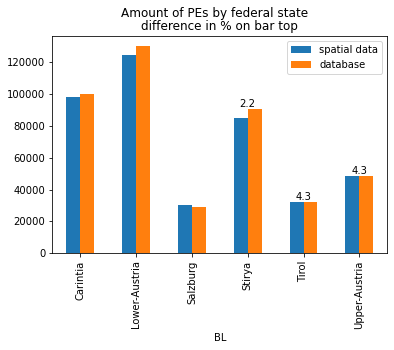

In [310]:
# add % difference!
fig,ax=plt.subplots()
x.sort_values('BL').plot.bar(y=['sum_PE','PE'],ax=ax)

which=[9,10,11,12,13,14,15,16,17]
values=[x for x in x.sort_values('BL')['diff'].round(1).abs()]
#values[5]=4.3

ax.legend(['spatial data','database'])
plt.suptitle('Amount of PEs by federal state')
ax.set_title('difference in % on bar top')


#which=range(len(ax.patches))
#which=[6,7,8,9,10,11]
#which=[0,1,2,3,4,5]
n=0
for index, rect in enumerate(ax.patches):
    if index in which:
        
        height = rect.get_height()
        ax.text(rect.get_x()-0.13 + rect.get_width() / 2, height+150 , values[n],
                ha='center', va='bottom', fontsize='medium', fontstretch='condensed')
        n=n+1
plt.savefig('graphs/spatial_precision.png', bbox_inches='tight')


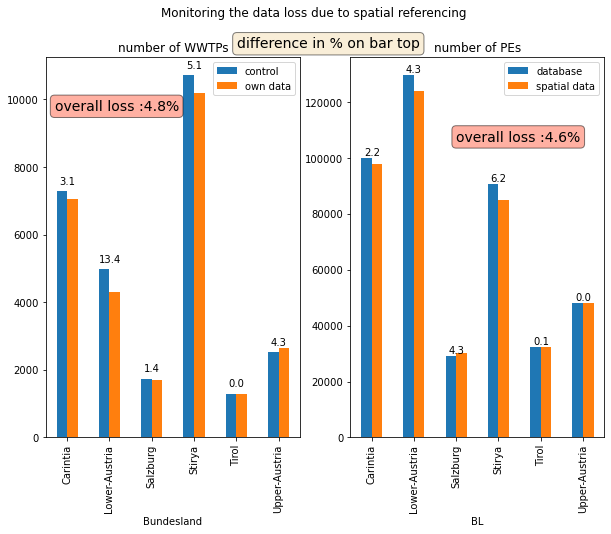

In [320]:
# add % difference!
fig,ax=plt.subplots(1,2, figsize=(10,7))

control_df.plot.bar(x='Bundesland',y=['control_freq_all','freq_all'],ax=ax[0])
which=[9,10,11,12,13,14,15,16,17]
values=[x for x in control_all['div'].round(1)]
values[5]=4.3
ax[0].legend(['control','own data'])
plt.suptitle('Monitoring the data loss due to spatial referencing ')
ax[0].set_title('number of WWTPs')


#which=range(len(ax.patches))
#which=[6,7,8,9,10,11]
which=[0,1,2,3,4,5]
n=0
for index, rect in enumerate(ax[0].patches):
    if index in which:
        
        height = rect.get_height()
        ax[0].text(rect.get_x()+0.13 + rect.get_width() / 2, height+150 , values[n],
                ha='center', va='bottom', fontsize='medium', fontstretch='condensed')
        n=n+1

excluded_states.sort_values('BL').plot.bar(y=['PE','sum_PE'],ax=ax[1])
which=[0,1,2,3,4,5]

values=[x for x in excluded_states.sort_values('BL')['diff'].round(1).abs()]
#values[0]=100
#values[4]=100
#values[5]=100
ax[1].legend(['database','spatial data'])
ax[1].set_title('number of PEs')
n=0
for index, rect in enumerate(ax[1].patches):
    if index in which:
        
        height = rect.get_height()
        ax[1].text(rect.get_x()+0.13 + rect.get_width() / 2, height+250 , values[n],
                ha='center', va='bottom', fontsize='medium', fontstretch='condensed')
        n=n+1
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)

fig.text(0.39, 0.92, 'difference in % on bar top', fontsize=14,
        verticalalignment='top',bbox=props)
props = dict(boxstyle='round', facecolor='tomato', alpha=0.5)
overall_freq=(control_all.control_freq_all.sum()-control_all.freq_all.sum())/control_all.control_freq_all.sum()*100
ax[0].text(-0.3, 10000, 'overall loss :{}%'.format(overall_freq.round(1)), fontsize=14,
        verticalalignment='top',bbox=props)
        
overall_PE=(x.PE.sum()-x.sum_PE.sum())/x.PE.sum()*100
ax[1].text(2, 110000, 'overall loss :{}%'.format(overall_PE.round(1)), fontsize=14,
        verticalalignment='top',bbox=props)
plt.savefig('graphs/spatial_precision.png', bbox_inches='tight')

# result : 
    > very good. minimal difference